# 巴比伦平方根算法实现与分析

## 问题描述

巴比伦平方根算法是一种古老而有效的数值方法，用于计算任意正数 y 的平方根。该算法基于迭代公式：

x_{n+1} = 1/2 * (x_n + y/x_n)

算法从初始猜测值 x₀ 开始，通过迭代逐步逼近 √y。随着迭代次数 n 的增加，近似值 xₙ 会收敛到真实的平方根。

## 解答思路

本实验通过实现两种不同停止准则的巴比伦算法来研究其收敛特性：

1. **基于真实误差的停止准则**：使用 εₙ = |xₙ - √y| 作为误差度量，当误差小于预设阈值时停止迭代
2. **基于相邻迭代差值的停止准则**：使用 εₙ = |xₙ₊₁ - xₙ| 作为误差度量，当差值足够小时停止迭代

通过分析不同初始猜测值 x₀ 对收敛速度的影响，以及两种误差度量方法的比较，我们可以深入理解巴比伦算法的收敛特性。

## 函数设计

### 函数一：基于真实误差的巴比伦算法

**功能**：使用真实误差作为停止准则的巴比伦算法

**参数**：
- y：需要计算平方根的正数
- epsilon：误差阈值
- x0：初始猜测值（默认为1）

**返回值**：
- 近似解 xₙ
- 迭代历史 x_his
- 误差序列 Error
- 迭代步数 i

**算法步骤**：
1. 初始化迭代计数器、迭代历史数组和误差序列
2. 在循环中应用巴比伦迭代公式更新近似值
3. 记录每次迭代的近似值和真实误差
4. 当真实误差小于预设阈值时停止迭代
5. 返回最终结果和相关数据

### 函数二：基于相邻迭代差值的巴比伦算法

**功能**：使用相邻迭代差值作为停止准则的巴比伦算法

**参数**：
- y：需要计算平方根的正数
- epsilon：误差阈值
- x0：初始猜测值（默认为15）

**返回值**：
- 近似解 xₙ
- 迭代历史 x_his
- 误差序列 Error
- 迭代步数 i

**算法步骤**：
1. 初始化迭代计数器、迭代历史数组和误差序列
2. 在循环中应用巴比伦迭代公式更新近似值
3. 记录每次迭代的近似值和相邻迭代差值
4. 当相邻迭代差值小于预设阈值时停止迭代
5. 返回最终结果和相关数据

### 函数三：比较不同初始值的收敛情况

**功能**：比较不同初始值的收敛情况

**参数**：
- y：需要计算平方根的正数
- epsilon：误差阈值
- x_total：初始猜测值列表（默认为[1, 3, 5, 7, 9]）

**返回值**：
- 所有初始值的误差序列 ErrorS
- 最大序列长度 max_length

**算法步骤**：
1. 对每个初始值运行基于真实误差的巴比伦算法
2. 收集所有初始值对应的误差序列
3. 确定最大序列长度
4. 填充序列使所有序列长度相同，便于比较
5. 返回处理后的误差序列和最大序列长度

## 使用示例

### 示例1：使用真实误差准则计算平方根

**测试案例**：计算52的平方根，精度要求为1e-9

**输出结果**：
- 迭代次数：7次
- 最终结果：7.211102550927983
- 最终误差：4.440892098500626e-15

**可视化**：绘制误差收敛图，展示误差随迭代次数减少的情况，使用对数坐标更清晰地显示收敛过程。

### 示例2：比较不同初始值的收敛情况

**测试案例**：计算52的平方根，使用初始值[1, 3, 5, 7, 9]，精度要求为1e-9

**输出结果**：
- 初始值1：迭代8次，最终误差4.44e-15
- 初始值3：迭代6次，最终误差7.07e-12
- 初始值5：迭代5次，最终误差1.93e-11
- 初始值7：迭代4次，最终误差3.46e-14
- 初始值9：迭代5次，最终误差7.11e-15

**可视化**：绘制不同初始值的误差收敛对比图，直观展示不同初始值对收敛速度的影响。

## 算法特点与分析

### 收敛特性
- 巴比伦算法具有二次收敛特性，收敛速度非常快
- 每次迭代的正确数字位数大约会翻倍
- 从实验结果可以看出，即使初始猜测值与真实解相差较大，算法也能快速收敛

### 初始值选择
- 初始值的选择会影响收敛速度
- 通常选择接近真实解的初始值可以加快收敛
- 从实验结果可以看出，初始值为7时收敛最快（仅需4次迭代）

### 停止准则比较
- 真实误差准则：需要知道真实解，实际应用中不常用
- 相邻迭代差值准则：更实用，不需要知道真实解
- 两种准则都能有效判断收敛，但适用场景不同

### 数值稳定性
- 算法对于大多数正数都是稳定的
- 当初始猜测值为0时会出现除零错误
- 对于负数，算法不收敛
- 算法具有良好的数值稳定性，能够达到机器精度

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

迭代了7次，最后迭代结果为7.211102550927983，误差为4.440892098500626e-15


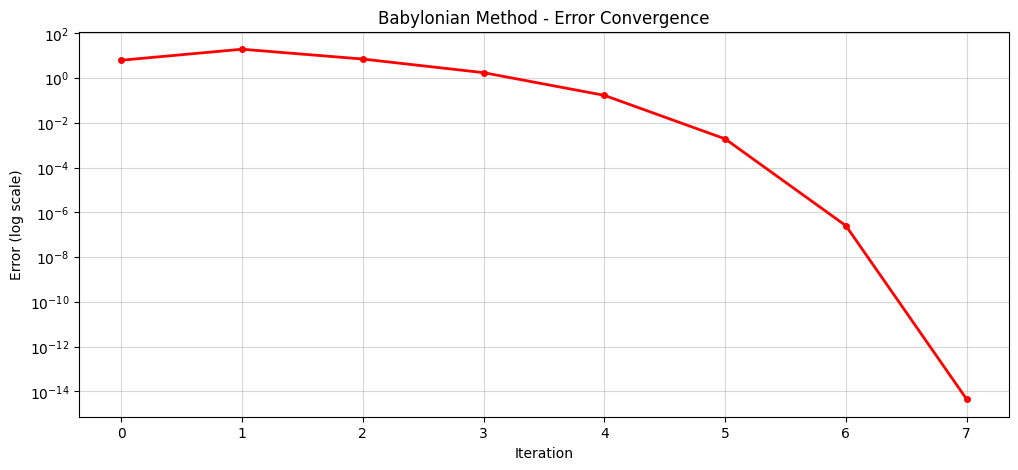

In [2]:
def babylonian(y, epsilon, x0=1):
    
    i = 0  # 迭代计数器
    x_his = [x0]  # 存储迭代过程中的所有x值
    Error = [abs(x0 - math.sqrt(y))]  # 存储每次迭代的真实误差
    
    while True:
        # 巴比伦迭代公式
        x = 0.5 * (x0 + y / x0)
        x_his.append(x)  # 记录当前迭代值
        x0 = x  # 更新x0为当前值，用于下一次迭代
        i += 1  # 迭代计数增加
        
        # 计算当前真实误差
        current_error = abs(x0 - math.sqrt(y))
        Error.append(current_error)
        
        # 检查是否达到目标精度
        if current_error < epsilon:
            return x0, x_his, Error, i
        # 防止无限循环，设置最大迭代次数
        elif i > 500:
            return 0

# 测试函数
sqrt_y, x_his, errors, steps = babylonian(52, 1e-9)
print(f'迭代了{steps}次，最后迭代结果为{sqrt_y}，误差为{errors[-1]}')

# 绘制误差收敛图
plt.figure(figsize=(12, 5))
plt.semilogy(range(len(errors)), errors, 'r.-', linewidth=2, markersize=8)
plt.xlabel('Iteration')
plt.ylabel('Error (log scale)')
plt.title('Babylonian Method - Error Convergence')
plt.grid(True, alpha=0.5)
plt.show()

初始值 1: 迭代 8 次, 最终误差 4.44e-15
初始值 3: 迭代 6 次, 最终误差 7.07e-12
初始值 5: 迭代 5 次, 最终误差 1.93e-11
初始值 7: 迭代 4 次, 最终误差 3.46e-14
初始值 9: 迭代 5 次, 最终误差 7.11e-15


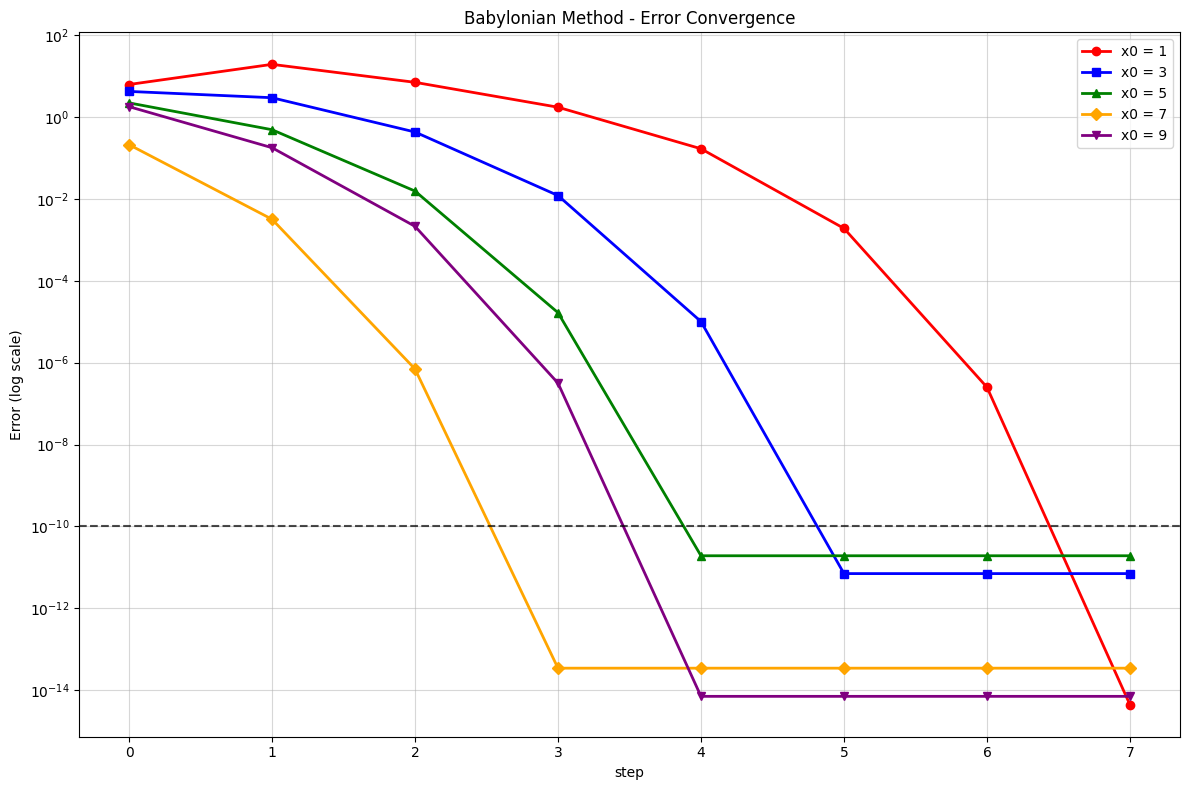

In [4]:

def babylonian3(y, epsilon, x_total=[1, 3, 5, 7, 9]):
    ErrorS = []  # 存储所有初始值的误差序列
    max_length = 0  # 记录最长的误差序列长度
    
    for x0 in x_total:
        i = 0
        x_current = x0
        sqrt_y = math.sqrt(y)
        Error = [abs(x_current - sqrt_y)]  # 当前初始值的误差序列
        
        while i < 500:  # 每个初始值单独计数
            x_next = 0.5 * (x_current + y / x_current)
            error = abs(x_next - sqrt_y)
            Error.append(error)
            
            if error < epsilon:
                break
                
            x_current = x_next
            i += 1
        
        ErrorS.append(Error)  # 将当前初始值的误差序列添加到总列表中
        max_length = max(max_length, len(Error))
        print(f"初始值 {x0}: 迭代 {len(Error)} 次, 最终误差 {Error[-1]:.2e}")
    
    return ErrorS, max_length

# 测试函数
y = 52
epsilon = 1e-10
Errors, max_len = babylonian3(y, epsilon)

# 绘制图形
plt.figure(figsize=(12, 8))

# 为每个初始值绘制误差收敛曲线
colors = ['red', 'blue', 'green', 'orange', 'purple']
markers = ['o', 's', '^', 'D', 'v']

for i, error_list in enumerate(Errors):
    # 如果希望所有曲线有相同长度的横坐标，可以填充到最大长度
    padded_errors = error_list + [error_list[-1]] * (max_len - len(error_list))
    
    plt.semilogy(range(max_len), padded_errors, 
                 color=colors[i % len(colors)],
                 marker=markers[i % len(markers)],
                 markersize=6,
                 linewidth=2,
                 label=f'x0 = {[1,3,5,7,9][i]}')

plt.xlabel('step')
plt.ylabel('Error (log scale)')
plt.title('Babylonian Method - Error Convergence')
plt.grid(True, alpha=0.5)
plt.legend()

# 添加目标精度线
plt.axhline(y=epsilon, color='black', linestyle='--', alpha=0.7, label=f'目标精度 {epsilon}')

plt.tight_layout()
plt.show()

迭代了6次，最后迭代结果为7.211102550927979，相邻迭代差值为3.907985046680551e-14


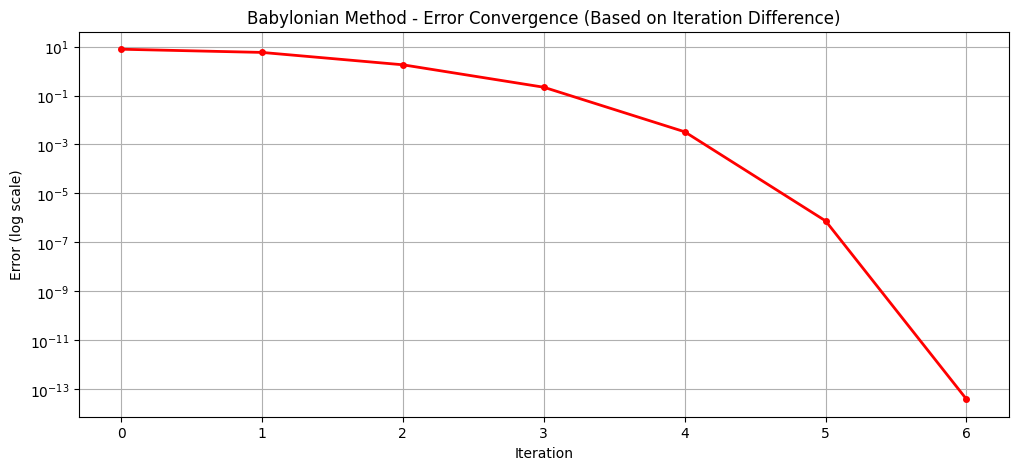

In [5]:
def babylonian2(y, epsilon, x0=15):
    
    i = 0  # 迭代计数器
    x_old = x0  # 存储前一次迭代的值
    x_new = x0  # 存储当前迭代的值
    x_his = [x0]  # 存储迭代过程中的所有x值
    Error = [abs(x0 - math.sqrt(y))]  # 初始真实误差（仅用于参考）
    
    while True:
        # 巴比伦迭代公式计算新值
        x_new = 0.5 * (x_old + y / x_old)
        
        # 计算相邻两次迭代的差值
        error = abs(x_new - x_old)
        
        # 记录迭代历史和误差
        x_his.append(x_new)
        Error.append(error)  # 注意：这里记录的是相邻迭代差值
        
        i += 1  # 迭代计数增加
        x_old = x_new  # 更新旧值为当前值
        
        # 检查相邻迭代差值是否达到目标精度
        if error < epsilon:
            return x_new, x_his, Error, i
        # 防止无限循环，设置最大迭代次数
        elif i > 500:
            return 0

# 测试函数
sqrt_y, x_his, errors, steps = babylonian2(52, 1e-10)
print(f'迭代了{steps}次，最后迭代结果为{sqrt_y}，相邻迭代差值为{errors[-1]}')

# 绘制误差收敛图
plt.figure(figsize=(12, 5))
plt.semilogy(range(len(errors)), errors, 'r.-', linewidth=2, markersize=8)
plt.xlabel('Iteration')
plt.ylabel('Error (log scale)')
plt.title('Babylonian Method - Error Convergence (Based on Iteration Difference)')
plt.grid(True)
plt.show()